In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
tips_df = sns.load_dataset('tips')
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## tips 샘플 데이터 탐색적 데이터분석(EDA)

In [3]:
# include = 'all' 수치형, 범주형 모든 데이터 검정통계량 살펴보기
tips_df.describe(include = 'all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


- X축,Y축에 필요한 정보를 넣어서 시각화 
- 범주형 데이터, 연속형자료형, 관측치(Y)축

<AxesSubplot:xlabel='day', ylabel='count'>

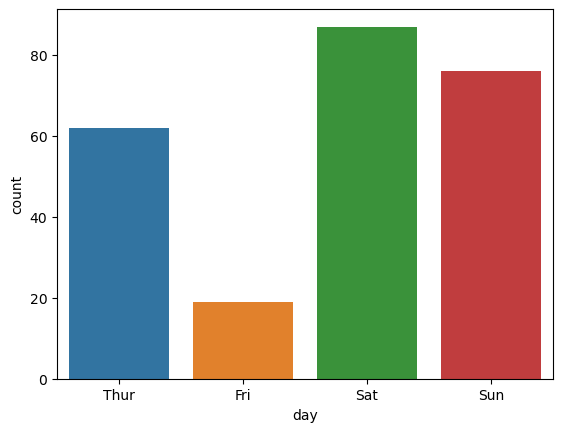

In [4]:
# countplot: x축 범주형, y축 관측치
sns.countplot(data = tips_df, x = 'day')

<AxesSubplot:xlabel='sex', ylabel='tip'>

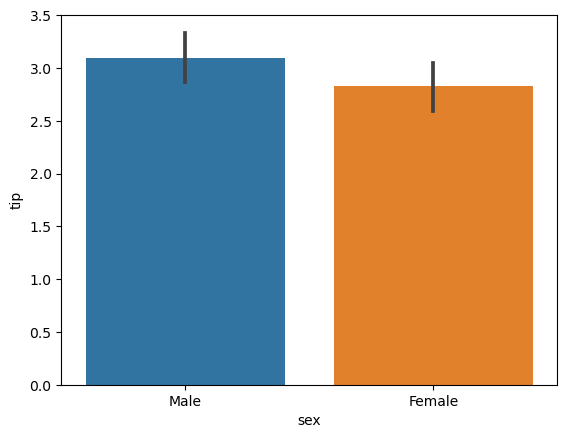

In [11]:
# barplot: X축이 범주형, Y축이 연속형 값
sns.barplot(data = tips_df, x = 'sex', y = 'tip')

<AxesSubplot:xlabel='time', ylabel='total_bill'>

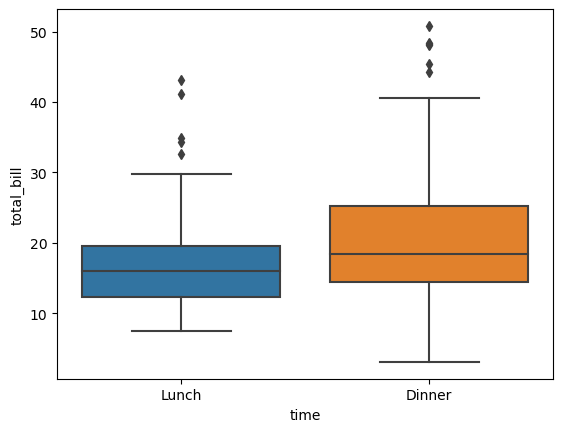

In [6]:
sns.boxplot(data = tips_df, x = 'time',y = 'total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

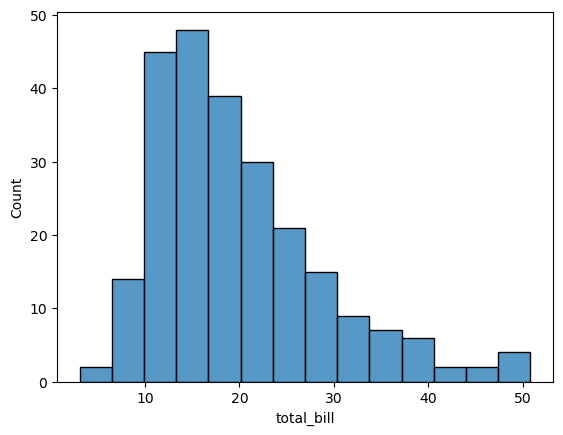

In [12]:
sns.histplot(data = tips_df, x = 'total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

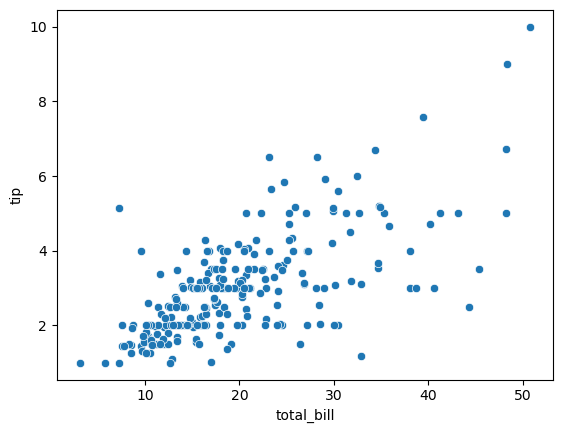

In [13]:
#X축: 수치형변수
#Y축: 수치형변수
sns.scatterplot(data = tips_df, x = 'total_bill', y = 'tip')

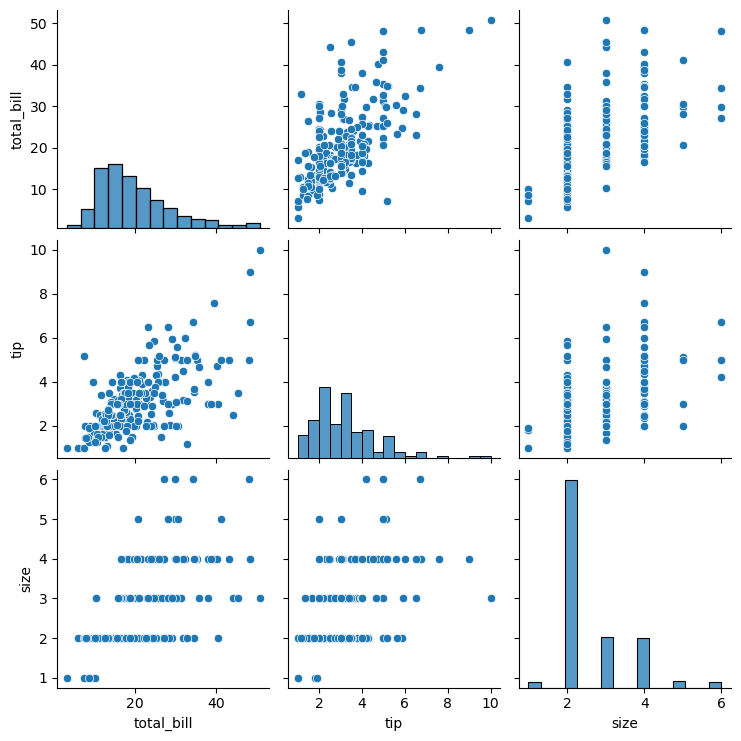

In [14]:
sns.pairplot(data = tips_df)

## 데이터 전처리

- ESD 이상치 처리

In [16]:
import numpy as np
mean = np.mean(tips_df['total_bill'])
std = np.std(tips_df['total_bill'])
upper_limit = mean + 3*std
lower_limit = mean - 3*std
print(upper_limit, lower_limit)

46.43839435626421 -6.866509110362568


In [21]:
condition = (tips_df['total_bill'] > upper_limit)
tips_df[condition]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4


- IQR를 이용한 이상치 확인(BoxPlot)

<AxesSubplot:xlabel='total_bill'>

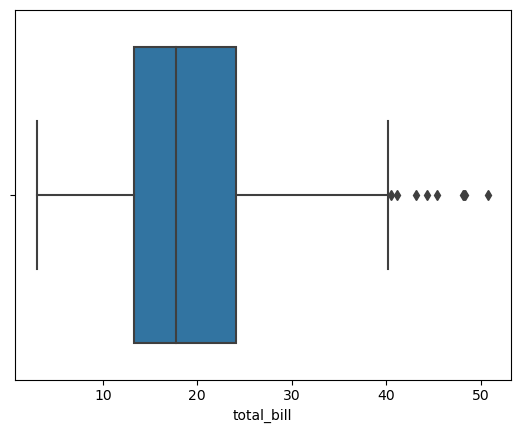

In [20]:
import seaborn as sns
sns.boxplot(tips_df['total_bill'])

In [22]:
q1 = tips_df['total_bill'].quantile(0.25)
q3 = tips_df['total_bill'].quantile(0.75)
iqr = q3 - q1
upper_limit2 = q3 + 1.5*iqr
lower_limit2 = q3 - 1.5*iqr
print(q1,q3,iqr, upper_limit2, lower_limit2)

13.3475 24.127499999999998 10.779999999999998 40.29749999999999 7.957500000000003


In [23]:
condition2 = (tips_df['total_bill'] > upper_limit2)
tips_df[condition2]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


## 결측치
- 타이타닉 데이터 

In [3]:
import pandas as pd
train_df = pd.read_csv('C:/Users/and_c/Desktop/sparta_python/titanic/train.csv')
#전처리할 때 원본 유지를 위해 복사본을 활용하는 것이 좋다.
titanic_df = train_df.copy()

In [4]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 무작정 null값 제거는 유의미한 로우데이터를 삭제해버릴 수 있다.
titanic_df.dropna(axis = 0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [16]:
# 보통은 평균값으로 null값을 대신하기도 한다.
# fillna 이용한 대치
age_mean = round(titanic_df['Age'].mean(),2)
titanic_df['Age_mean'] = titanic_df['Age'].fillna(age_mean)

In [17]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 90.6+ KB


- SimpleImputer를 이용한 대치

In [20]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
si.fit(titanic_df[['Age']])

SimpleImputer()

In [ ]:
si.statistics_

In [22]:
titanic_df['Age_si_mean'] = si.transform(titanic_df[['Age']])

In [23]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_mean     891 non-null    float64
 13  Age_si_mean  891 non-null    float64
dtypes: float64(4), int64(5), object(5)
memory usage: 97.6+ KB


## 범주형 데이터 전처리 - 인코딩

- 성별(Sex)는 LabelEncoder
- 항구(Embarked)는 OneHotEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()

In [26]:
le.fit(titanic_df[['Sex']])

c:\Users\and_c\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [27]:
le.classes_

array(['female', 'male'], dtype=object)

In [28]:
titanic_df['Sex_le'] = le.transform(titanic_df[['Sex']])

c:\Users\and_c\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [30]:
oe.fit(titanic_df[['Embarked']])

OneHotEncoder()

In [31]:
oe.categories_

[array(['C', 'Q', 'S', nan], dtype=object)]

In [34]:
embarked_csr = oe.transform(titanic_df[['Embarked']])
embarked_csr_df = pd.DataFrame(embarked_csr.toarray(), columns = oe.get_feature_names_out())
embarked_csr_df.head(3)

,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0


In [36]:
pd.concat([titanic_df, embarked_csr_df],axis = 1).head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_si_mean,Sex_le,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,1,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,0.0,0.0,1.0,0.0


### 수치형 데이터 전처리 - 스케일링

- Age는 StandardScaler
- Fare은 MinMaxScaler

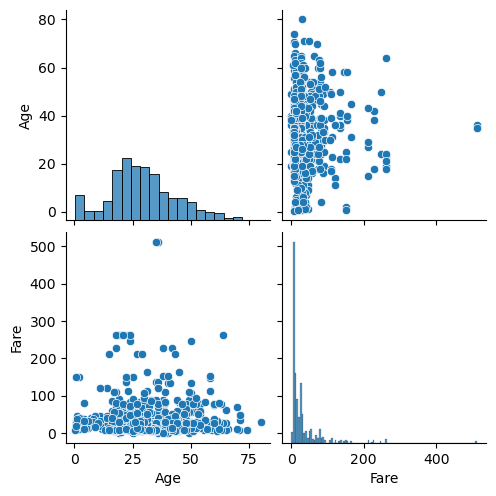

In [38]:
import seaborn as sns
sns.pairplot(titanic_df[['Age','Fare']])

In [41]:
titanic_df[['Age','Fare']].describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [42]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_sc = MinMaxScaler()
sd_sc = StandardScaler()

In [49]:
# fit과 transform을 동시에 fit_transform
titanic_df['Age_mean_mm_sc'] = mm_sc.fit_transform(titanic_df[['Age_mean']])
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_si_mean,Sex_le,Age_mean_mm_sc,Fare_sd_sc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,1,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,0.321438,-0.488854


In [50]:
titanic_df['Fare_sd_sc'] = sd_sc.fit_transform(titanic_df[['Fare']])
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mean,Age_si_mean,Sex_le,Age_mean_mm_sc,Fare_sd_sc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0,1,0.271174,-0.502445
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0,0,0.472229,0.786845
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0,0,0.321438,-0.488854


In [63]:
sns.histplot(titanic_df['Age_mean_mm_sc'], bins = 100)

<AxesSubplot:xlabel='Age_mean_mm_sc', ylabel='Count'>

In [65]:
sns.histplot(titanic_df['Fare_sd_sc'])

<AxesSubplot:xlabel='Fare_sd_sc', ylabel='Count'>

- 분석을 시작하기 앞서 Train과 test 데이터 셋 분리하기
- x변수 fare, sex
- y변수 survived

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(titanic_df[['Fare','Sex']], titanic_df[['Survived']],
                                                    test_size = 0.3, shuffle= True, random_state= 42,stratify=titanic_df[['Survived']])

In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(623, 2) (268, 2) (623, 1) (268, 1)


In [57]:
# 원자료 891개 Y값의 분포
sns.countplot(data = titanic_df, x = 'Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

In [59]:
sns.countplot(data = y_train, x = 'Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>